In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df = pd.read_csv('heart.csv')
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [5]:
df.describe(include='O')

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
count   918           918        918            918      918
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            547      460

In [6]:
df.select_dtypes(include="O")

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0     M           ATA     Normal              N       Up
1     F           NAP     Normal              N     Flat
2     M           ATA         ST              N       Up
3     F           ASY     Normal              Y     Flat
4     M           NAP     Normal              N       Up
..   ..           ...        ...            ...      ...
913   M            TA     Normal              N     Flat
914   M           ASY     Normal              N     Flat
915   M           ASY     Normal              Y     Flat
916   F           ATA        LVH              N     Flat
917   M           NAP     Normal              N       Up

[918 rows x 5 columns]

In [7]:
cols = df.select_dtypes(include="O").columns
cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder

# initiating the encoder class
lenc = LabelEncoder()

# looping over each columns from the object type columns
for col in cols:
    # encode these columns
    df[col] = lenc.fit_transform(df[col])

# diplaying 
df.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0

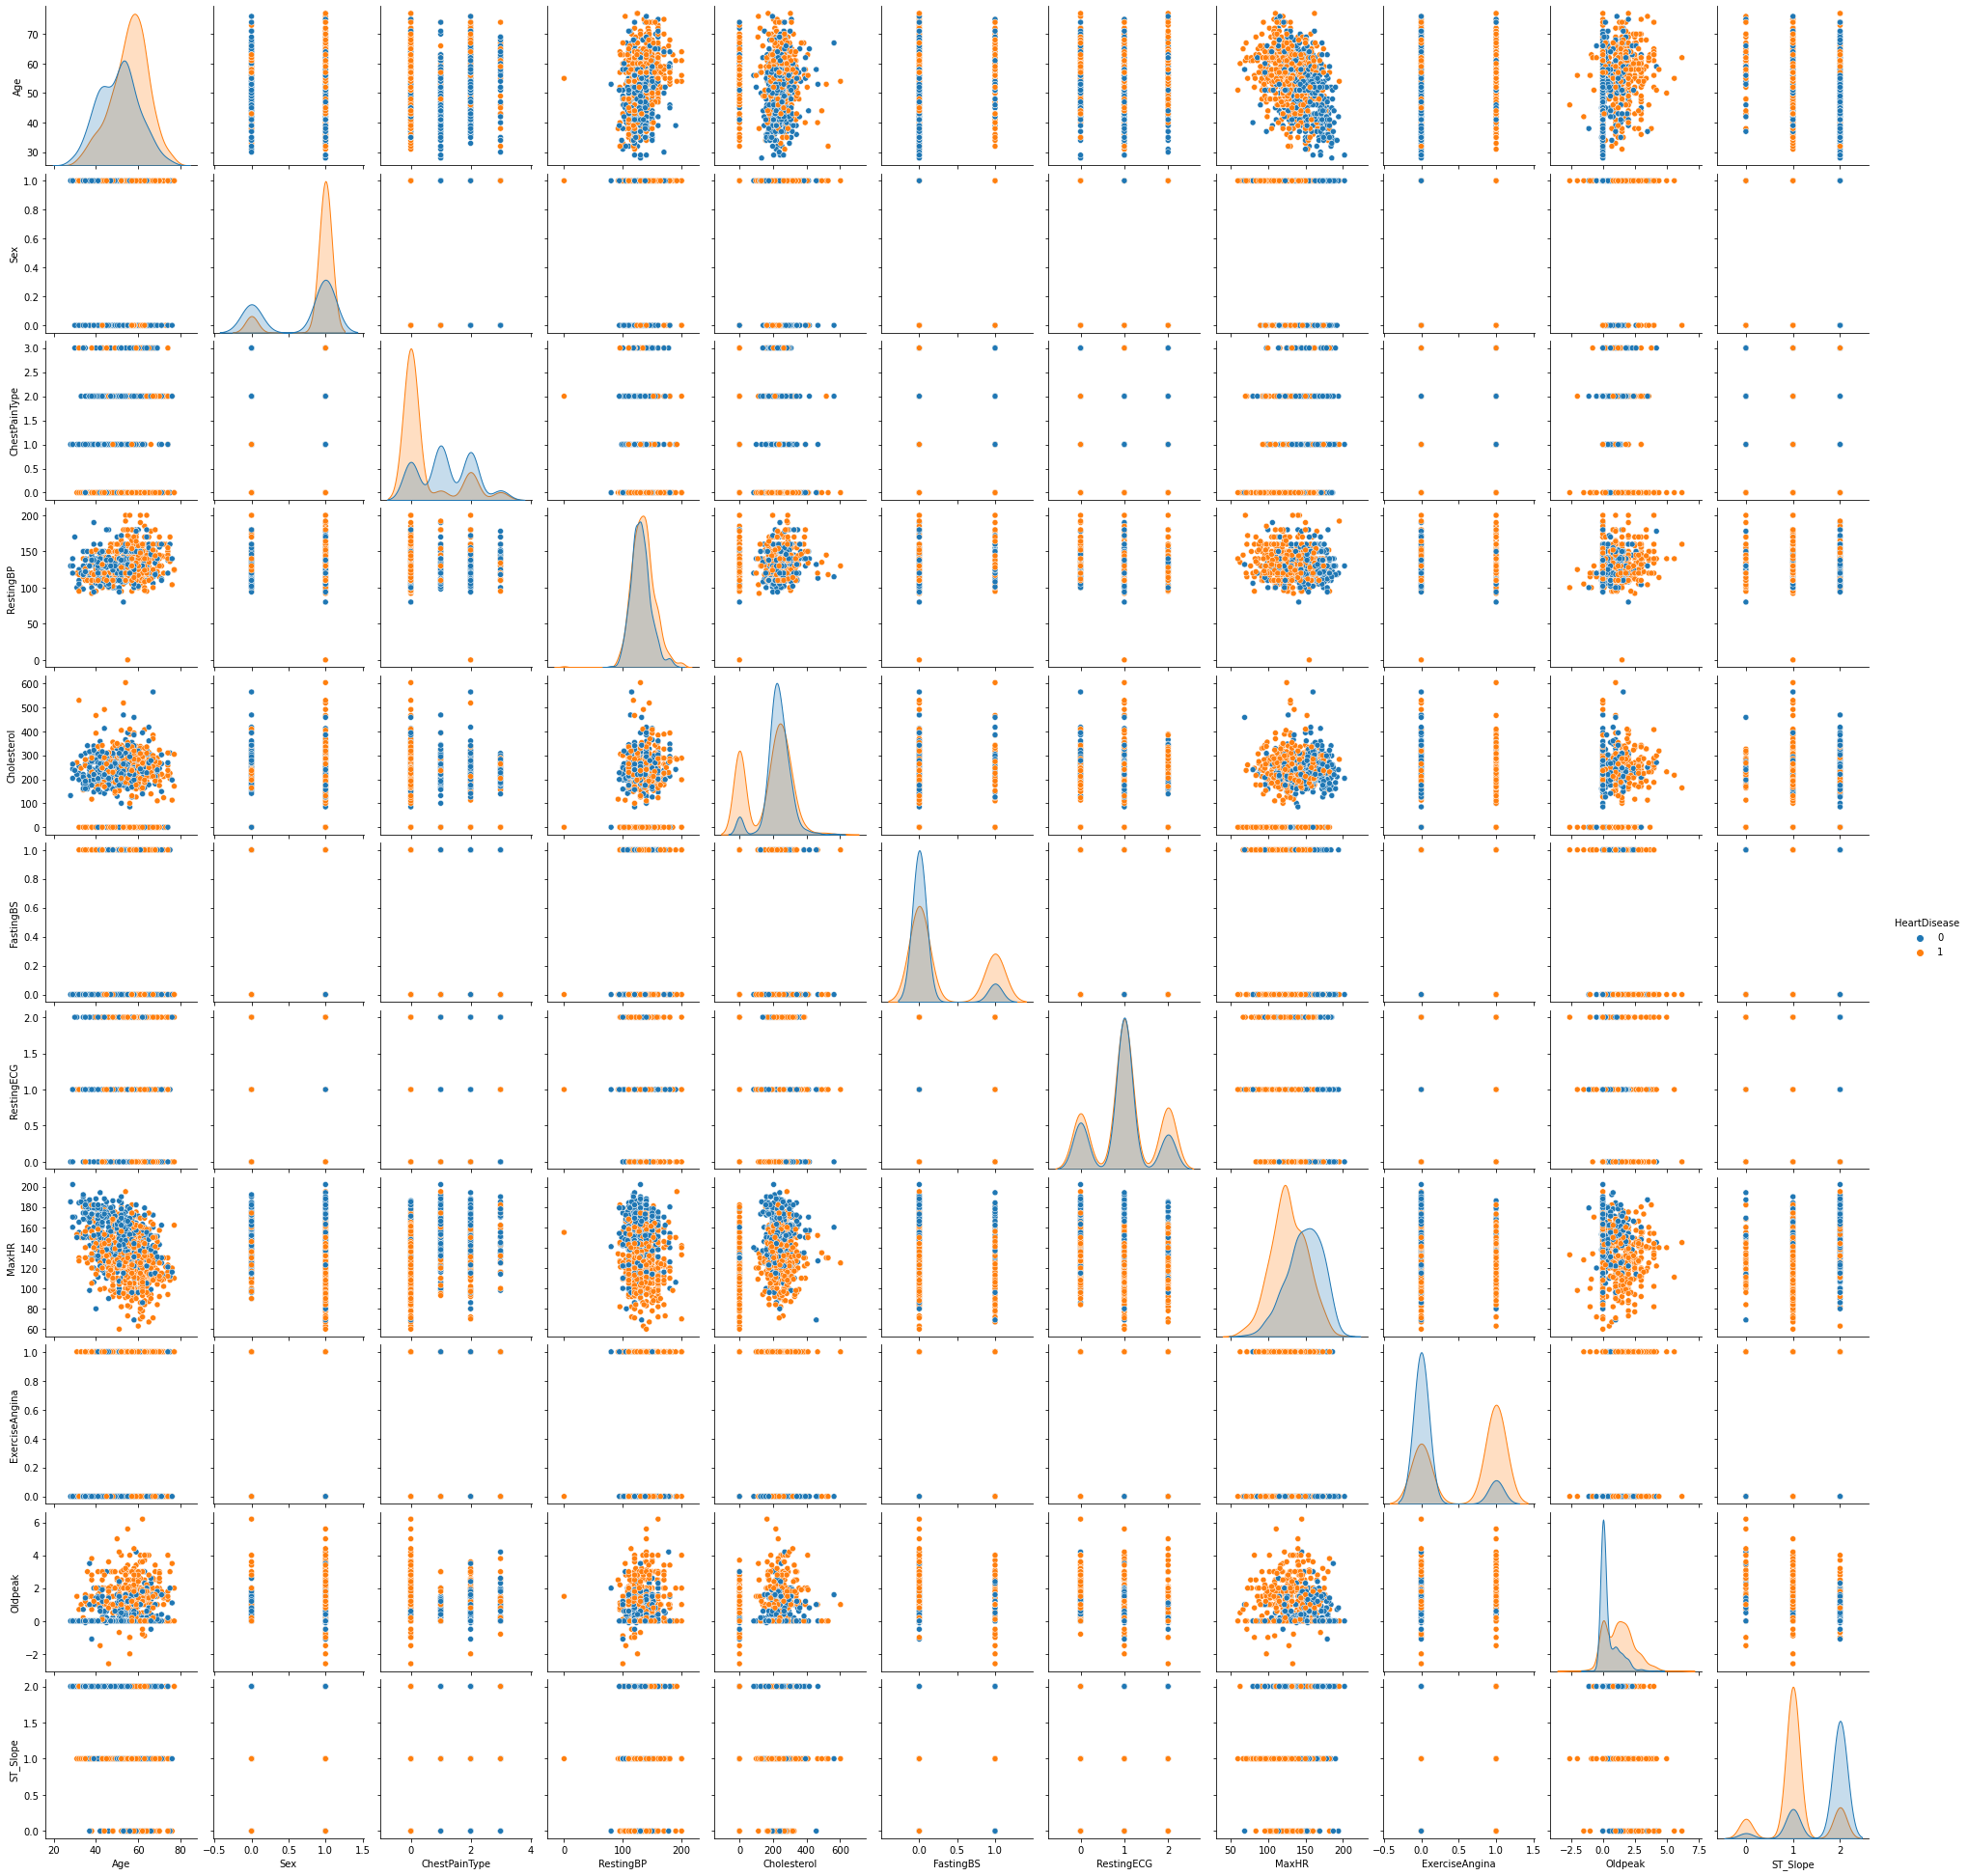

In [9]:
sns.pairplot(data=df, hue="HeartDisease");


<AxesSubplot:>

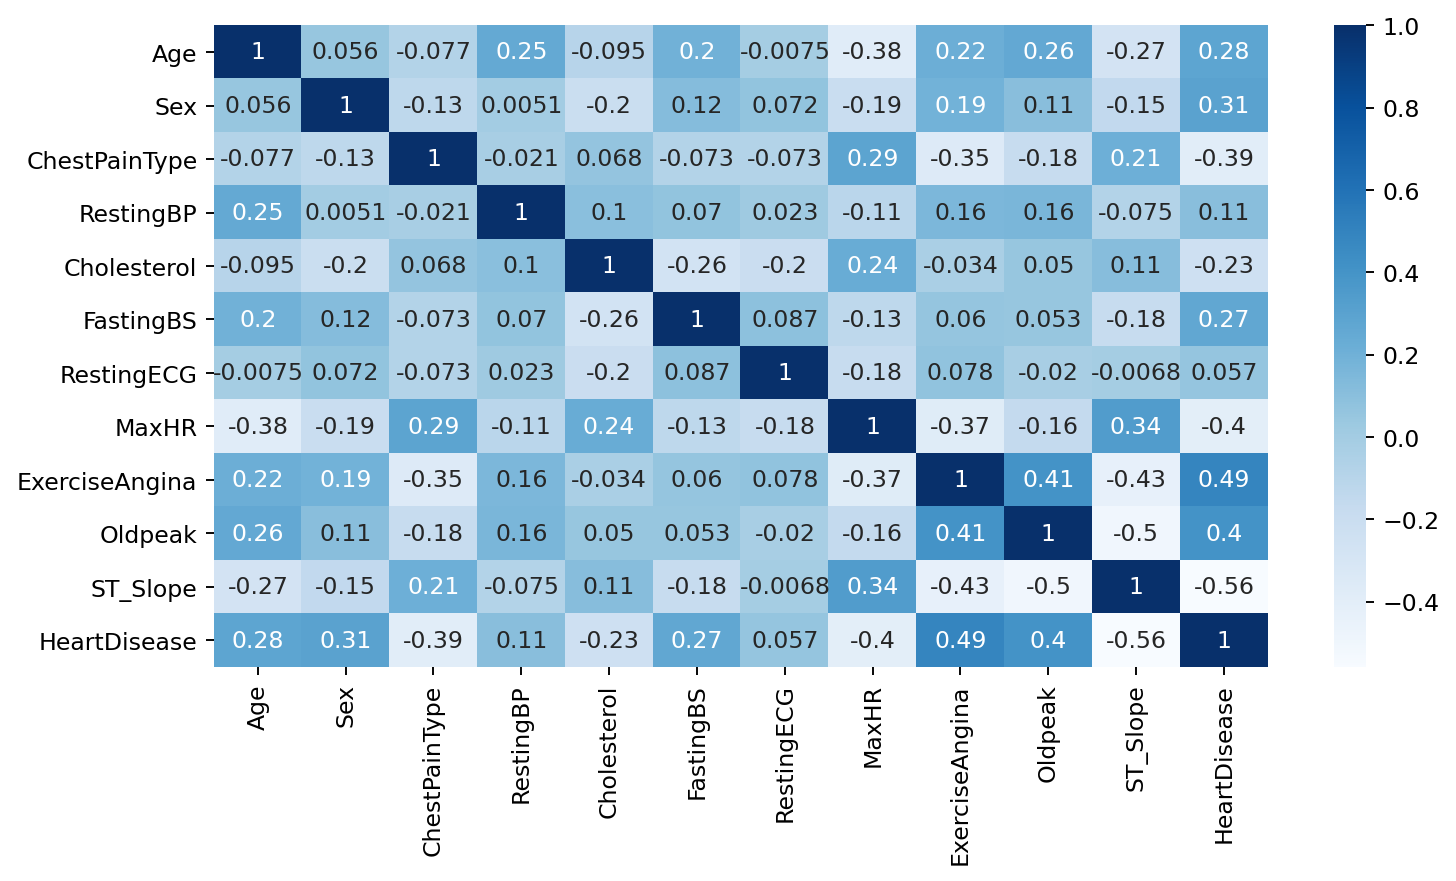

In [10]:
fig = plt.figure(figsize=(10,5), dpi=170)
sns.heatmap(df.corr(), cmap="Blues", annot=True)

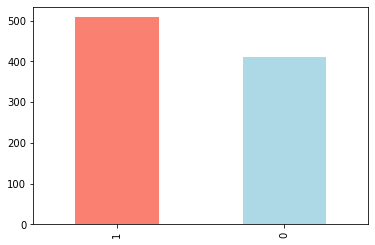

In [11]:
df.HeartDisease.value_counts()
df.HeartDisease.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
fig = px.pie(df, names='HeartDisease', color_discrete_sequence=['#D81E1F','#0D3383'])
fig.update_layout(title='% of Heart Disease Patients')
# tmp = {"yyep","nope"}
# fig.update_layout(legend = tmp)
fig.show()

In [12]:
fig = px.histogram(df, x="Age", marginal="box")
fig.update_layout(title='Age Distribution')
fig.show()

In [13]:
fig = px.histogram(df, x="Age",color='HeartDisease', barmode='group', color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()
print()
print()
df.Age.value_counts()

54    51
58    42
55    41
57    38
56    38
52    36
62    35
59    35
51    35
53    33
60    32
48    31
61    31
63    30
50    25
43    24
46    24
41    24
64    22
49    21
65    21
47    19
44    19
45    18
42    18
38    16
67    15
39    15
69    13
40    13
66    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
32     5
71     5
72     4
75     3
29     3
76     2
77     2
33     2
31     2
73     1
30     1
28     1
Name: Age, dtype: int64

In [14]:
pd.crosstab(df.HeartDisease, df.Age)

Age           28  29  30  31  32  33  34  35  36  37  ...  68  69  70  71  72  \
HeartDisease                                          ...                       
0              1   3   1   1   3   1   5   7   4  10  ...   4   3   1   3   1   
1              0   0   0   1   2   1   2   4   2   1  ...   6  10   6   2   3   

Age           73  74  75  76  77  
HeartDisease                      
0              0   2   1   1   0  
1              1   5   2   1   2  

[2 rows x 50 columns]

In [15]:
fig = px.pie(df, names='Sex',color_discrete_sequence=['#D81E1F','#0D3383'])
fig.update_layout(title='% of Sex')
fig.show()
fig = px.histogram(df, x="Sex",color='HeartDisease', barmode='group', color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()
print()
print()
df.Sex.value_counts()
pd.crosstab(df.HeartDisease, df.Sex)

Sex             0    1
HeartDisease          
0             143  267
1              50  458

In [16]:
fig = px.pie(df, names='ChestPainType', color_discrete_sequence=['#D81E1F','#0D3383'])
fig.update_layout(title='% of Chest Pain Type')
fig.show()
fig = px.histogram(df, x="ChestPainType",color='HeartDisease', barmode='group', color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()
print()
print()
df.ChestPainType.value_counts()
pd.crosstab(df.HeartDisease, df.ChestPainType)

ChestPainType    0    1    2   3
HeartDisease                    
0              104  149  131  26
1              392   24   72  20

In [17]:
fig = px.histogram(df, x="RestingBP", marginal="box", histnorm='probability density', color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.update_layout(title="Distribution of RestingBP")
fig.show()
fig = px.histogram(df, x="RestingBP",color='HeartDisease', barmode='group', color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()
print()
print()
df.RestingBP.value_counts()
pd.crosstab(df.HeartDisease, df.RestingBP)

RestingBP     0    80   92   94   95   96   98   100  101  102  ...  165  170  \
HeartDisease                                                    ...             
0               0    1    0    2    0    0    1    8    1    2  ...    0    3   
1               1    0    1    0    6    1    0    7    0    1  ...    2   11   

RestingBP     172  174  178  180  185  190  192  200  
HeartDisease                                          
0               1    0    1    6    0    1    0    0  
1               1    1    2    6    1    1    1    4  

[2 rows x 67 columns]

In [18]:
fig = px.histogram(df, x="RestingBP", marginal="box", histnorm='probability density', color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.update_layout(title="Distribution of RestingBP")
fig.show()
fig = px.histogram(df, x="RestingBP",color='HeartDisease', barmode='group', color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()
print()
print()
df.Cholesterol.value_counts()
pd.crosstab(df.HeartDisease, df.Cholesterol)

Cholesterol   0    85   100  110  113  117  123  126  129  131  ...  412  417  \
HeartDisease                                                    ...             
0              20    1    1    0    0    0    0    1    1    0  ...    1    1   
1             152    0    1    1    1    1    1    1    0    1  ...    0    0   

Cholesterol   458  466  468  491  518  529  564  603  
HeartDisease                                          
0               1    0    1    0    0    0    1    0  
1               0    1    0    1    1    1    0    1  

[2 rows x 222 columns]

In [19]:
fig = px.pie(df, names='FastingBS', color_discrete_sequence=['#D81E1F','#0D3383'])
fig.update_layout(title='% of FastingBS')
fig.show()
fig = px.histogram(df, x="FastingBS",color='HeartDisease', barmode='group', color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()
print()
print()
df.FastingBS.value_counts()
pd.crosstab(df.HeartDisease, df.FastingBS)

FastingBS       0    1
HeartDisease          
0             366   44
1             338  170

In [20]:
fig = px.pie(df, names='RestingECG', color_discrete_sequence=['#D81E1F','#0D3383'])
fig.update_layout(title='% of RestingECG')
fig.show()
fig = px.histogram(df, x="RestingECG",color='HeartDisease', barmode='group', color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()
print()
print()
df.RestingECG.value_counts()
pd.crosstab(df.HeartDisease, df.RestingECG)

RestingECG      0    1    2
HeartDisease               
0              82  267   61
1             106  285  117

In [21]:
fig = px.histogram(df, x="MaxHR", marginal="box", histnorm='probability density', color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.update_layout(title="Distribution of MaxHR")
fig.show()
fig = px.histogram(df, x="MaxHR",color='HeartDisease', barmode='group', color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()
print()
print()
df.MaxHR.value_counts()
pd.crosstab(df.HeartDisease, df.MaxHR)

MaxHR         60   63   67   69   70   71   72   73   77   78   ...  184  185  \
HeartDisease                                                    ...             
0               0    0    0    1    0    0    0    0    0    0  ...    4    4   
1               1    1    1    0    1    1    2    1    1    1  ...    0    0   

MaxHR         186  187  188  190  192  194  195  202  
HeartDisease                                          
0               2    1    2    2    1    1    0    1  
1               0    0    0    0    0    0    1    0  

[2 rows x 119 columns]

In [22]:
fig = px.pie(df, names='ExerciseAngina', color_discrete_sequence=['#D81E1F','#0D3383'])
fig.update_layout(title='% of ExerciseAngina')
fig.show()
fig = px.histogram(df, x="ExerciseAngina",color='HeartDisease', barmode='group', color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()
print()
print()
df.ExerciseAngina.value_counts()
pd.crosstab(df.HeartDisease, df.ExerciseAngina)

ExerciseAngina    0    1
HeartDisease            
0               355   55
1               192  316

In [23]:
fig = px.histogram(df, x="Oldpeak", marginal="box", histnorm='probability density', color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.update_layout(title="Distribution of Oldpeak")
fig.show()
fig = px.histogram(df, x="Oldpeak",color='HeartDisease', barmode='group', color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()
print()
print()
df.Oldpeak.value_counts()
pd.crosstab(df.HeartDisease, df.Oldpeak)

Oldpeak       -2.6  -2.0  -1.5  -1.1  -1.0  -0.9  -0.8  -0.7  -0.5  -0.1  ...  \
HeartDisease                                                              ...   
0                0     0     0     1     0     0     0     0     1     2  ...   
1                1     1     1     0     2     1     1     1     1     0  ...   

Oldpeak        3.5   3.6   3.7   3.8   4.0   4.2   4.4   5.0   5.6   6.2  
HeartDisease                                                              
0                1     0     0     0     0     1     0     0     0     0  
1                1     4     1     1     8     1     1     1     1     1  

[2 rows x 53 columns]

In [24]:
fig = px.pie(df, names='ST_Slope', color_discrete_sequence=['#D81E1F','#0D3383'])
fig.update_layout(title='% of ST_Slope')
fig.show()
fig = px.histogram(df, x="ST_Slope",color='HeartDisease', barmode='group', color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()
print()
print()
df.ST_Slope.value_counts()
pd.crosstab(df.HeartDisease, df.ST_Slope)

ST_Slope       0    1    2
HeartDisease              
0             14   79  317
1             49  381   78

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve, auc

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [26]:
X = df.drop(columns=["HeartDisease"],axis=1)
y = df["HeartDisease"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
indivisual_models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
}

In [30]:
individual_model_results = {}
ensemble_model_results = {}
# Create empty dictionaries to store ROC-AUC results
individual_roc_auc_results = {}
ensemble_roc_auc_results = {}


In [89]:
for model_name, model in indivisual_models.items():
    print(f"Evaluating {model_name}...")
    
    # Evaluate ensemble models with cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    avg_cv_score = np.mean(cv_scores)
    
    # Evaluate individual models
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    

    
    # Store results for individual models
    individual_model_results[model_name] = {
        "Cross-Validation Mean Accuracy": avg_cv_score,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
    }
for model_name, model in indivisual_models.items():
    print()
    print(model_name)
    print(individual_model_results[model_name])
    print()


Evaluating Logistic Regression...
Evaluating SVM...
Evaluating K-Nearest Neighbors...
Evaluating Naive Bayes...
Evaluating Decision Tree...

Logistic Regression
{'Cross-Validation Mean Accuracy': 0.856937843630603, 'Accuracy': 0.8315217391304348, 'Precision': 0.8392857142857143, 'Recall': 0.8785046728971962, 'F1 Score': 0.8584474885844748, 'ROC AUC': 0.9019298458550794}


SVM
{'Cross-Validation Mean Accuracy': 0.8787531450936539, 'Accuracy': 0.8641304347826086, 'Precision': 0.8660714285714286, 'Recall': 0.9065420560747663, 'F1 Score': 0.8858447488584474, 'ROC AUC': 0.9044786988712222}


K-Nearest Neighbors
{'Cross-Validation Mean Accuracy': 0.8460162147050602, 'Accuracy': 0.8695652173913043, 'Precision': 0.8952380952380953, 'Recall': 0.8785046728971962, 'F1 Score': 0.8867924528301887, 'ROC AUC': 0.8848161184609784}


Naive Bayes
{'Cross-Validation Mean Accuracy': 0.8568912496505451, 'Accuracy': 0.8478260869565217, 'Precision': 0.8623853211009175, 'Recall': 0.8785046728971962, 'F1 Score

Evaluating Logistic Regression...


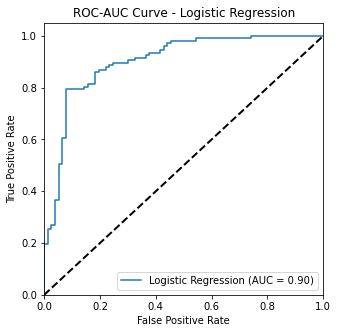

Evaluating SVM...


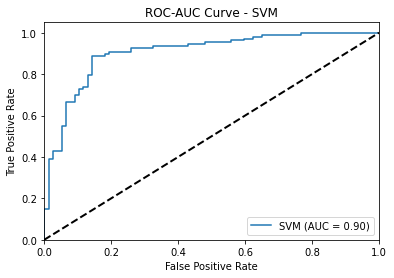

Evaluating K-Nearest Neighbors...


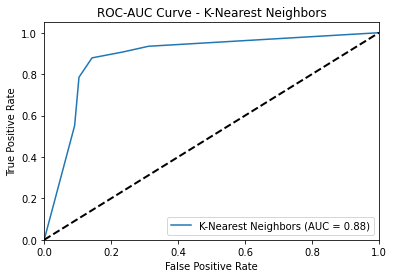

Evaluating Naive Bayes...


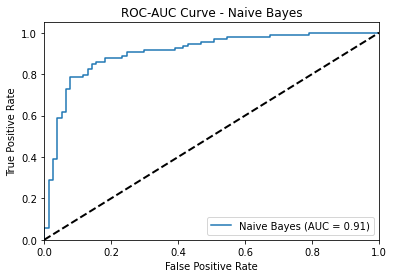

Evaluating Decision Tree...


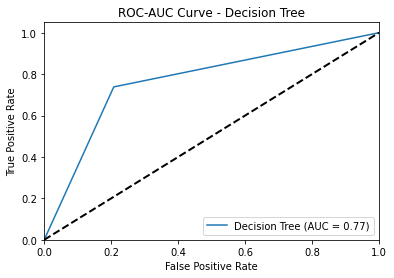

In [90]:
# Plot ROC-AUC curves for each individual model
plt.figure(figsize=(5,5))
for model_name, model in indivisual_models.items():
    print(f"Evaluating {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Predict the probabilities of the positive class
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Calculate AUC (ROC-AUC)
    roc_auc = auc(fpr, tpr)
    
    # Store results for individual models
    individual_roc_auc_results[model_name] = {
        "fpr": fpr,
        "tpr": tpr,
        "roc_auc": roc_auc
    }
    
    # Plot ROC curve for the individual model
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    # Add a diagonal line for reference
    plt.plot([0, 1], [0, 1], 'k--', lw=2)

    # Configure plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-AUC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()



In [91]:
ensemble_models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "Gradient Boosting ": GradientBoostingClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(n_estimators=100) 
}

In [92]:
for model_name, model in ensemble_models.items():
    print(f"Evaluating {model_name}...")
    
    # Evaluate ensemble models with cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    avg_cv_score = np.mean(cv_scores)
    
    # Fit the ensemble model on the full training data
    model.fit(X_train, y_train)
    
    # Predictions on the test data
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Store results for ensemble models
    ensemble_model_results[model_name] = {
        "Cross-Validation Mean Accuracy": avg_cv_score,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
    }
for model_name, model in ensemble_models.items():
    print()
    print(model_name)
    print(ensemble_model_results[model_name])
    print()
    


Evaluating Random Forest...
Evaluating AdaBoost...
Evaluating Gradient Boosting ...
Evaluating XGBoost...

Random Forest
{'Cross-Validation Mean Accuracy': 0.8760041002702451, 'Accuracy': 0.842391304347826, 'Precision': 0.8421052631578947, 'Recall': 0.897196261682243, 'F1 Score': 0.8687782805429863, 'ROC AUC': 0.9221386090544968}


AdaBoost
{'Cross-Validation Mean Accuracy': 0.8433603578417669, 'Accuracy': 0.8260869565217391, 'Precision': 0.8378378378378378, 'Recall': 0.8691588785046729, 'F1 Score': 0.8532110091743118, 'ROC AUC': 0.8792329166160942}


Gradient Boosting 
{'Cross-Validation Mean Accuracy': 0.8869257291957879, 'Accuracy': 0.8641304347826086, 'Precision': 0.8660714285714286, 'Recall': 0.9065420560747663, 'F1 Score': 0.8858447488584474, 'ROC AUC': 0.9202573127806772}


XGBoost
{'Cross-Validation Mean Accuracy': 0.8514677103718199, 'Accuracy': 0.8532608695652174, 'Precision': 0.8636363636363636, 'Recall': 0.8878504672897196, 'F1 Score': 0.8755760368663594, 'ROC AUC': 0.91552

Evaluating Random Forest...


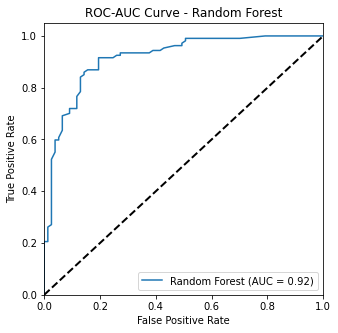

Evaluating AdaBoost...


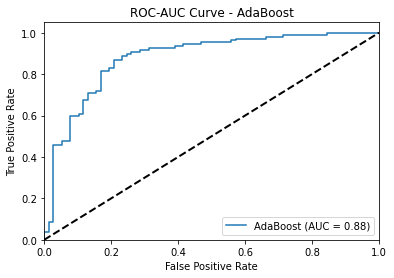

Evaluating Gradient Boosting ...


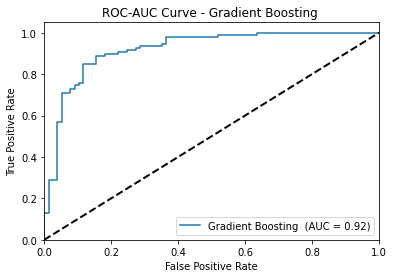

Evaluating XGBoost...


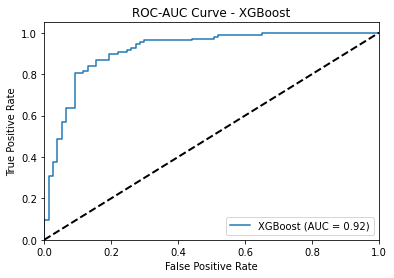

In [93]:
# Plot ROC-AUC curves for each individual model
plt.figure(figsize=(5,5))
for model_name, model in ensemble_models.items():
    print(f"Evaluating {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the probabilities of the positive class
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Calculate AUC (ROC-AUC)
    roc_auc = auc(fpr, tpr)
    
    # Store results for individual models
    ensemble_roc_auc_results[model_name] = {
        "fpr": fpr,
        "tpr": tpr,
        "roc_auc": roc_auc
    }
    
    # Plot ROC curve for the individual model
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    # Add a diagonal line for reference
    plt.plot([0, 1], [0, 1], 'k--', lw=2)

    # Configure plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-AUC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# # Add a diagonal line for reference
# plt.plot([0, 1], [0, 1], 'k--', lw=2)

# # Configure plot
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC-AUC Curve - Individual Model Comparison')
# plt.legend(loc="lower right")
# plt.show()

Evaluating Logistic Regression...
Evaluating SVM...
Evaluating K-Nearest Neighbors...
Evaluating Naive Bayes...
Evaluating Decision Tree...


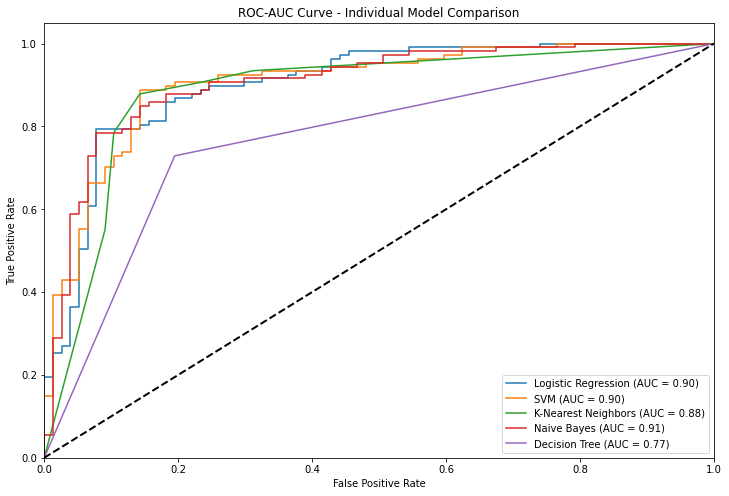

Evaluating Random Forest Ensemble...
Evaluating AdaBoost Ensemble...
Evaluating Gradient Boosting Ensemble...
Evaluating XGBoost...


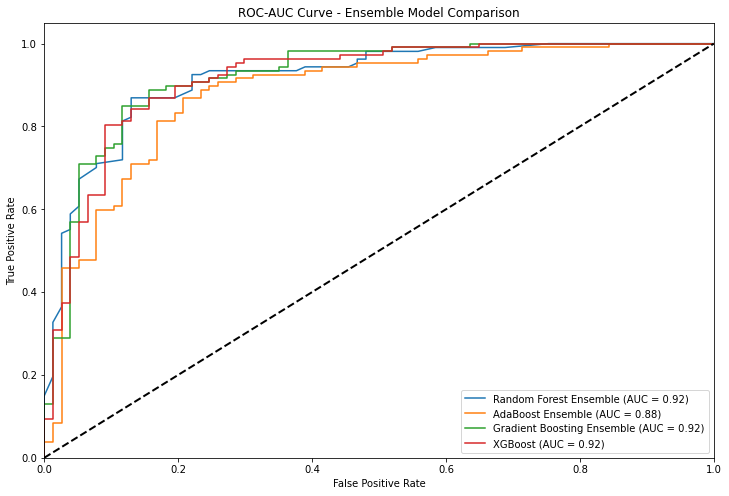

In [36]:
# Create empty dictionaries to store ROC-AUC results
individual_roc_auc_results = {}
ensemble_roc_auc_results = {}

# Plot ROC-AUC curves for each individual model
plt.figure(figsize=(12, 8))
for model_name, model in indivisual_models.items():
    print(f"Evaluating {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the probabilities of the positive class
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Calculate AUC (ROC-AUC)
    roc_auc = auc(fpr, tpr)
    
    # Store results for individual models
    individual_roc_auc_results[model_name] = roc_auc
    
    # Plot ROC curve for the individual model
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Add a diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve - Individual Model Comparison')
plt.legend(loc="lower right")
plt.show()

# Plot ROC-AUC curves for ensemble models
plt.figure(figsize=(12, 8))
for model_name, model in ensemble_models.items():
    print(f"Evaluating {model_name}...")
    
    # Train the ensemble model
    model.fit(X_train, y_train)
    
    # Predict the probabilities of the positive class
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Calculate AUC (ROC-AUC)
    roc_auc = auc(fpr, tpr)
    
    # Store results for ensemble models
    ensemble_roc_auc_results[model_name] = roc_auc
    
    # Plot ROC curve for the ensemble model
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Add a diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve - Ensemble Model Comparison')
plt.legend(loc="lower right")
plt.show()


In [51]:
def plot_comparison(results, title):
    metrics = list(results[list(results.keys())[0]].keys())
    models = list(results.keys())
    
    for metric in metrics:
        metric_values = [result[metric] for result in results.values()]
        plt.bar(models, metric_values)
        plt.xlabel('Models')
        plt.ylabel(metric)
        plt.title(title)
        plt.show()

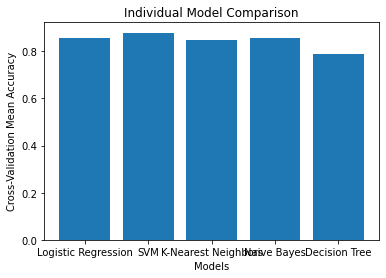

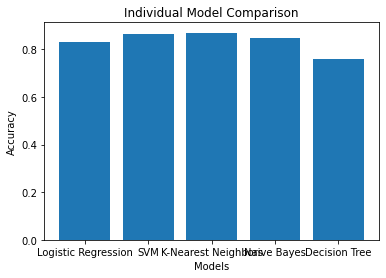

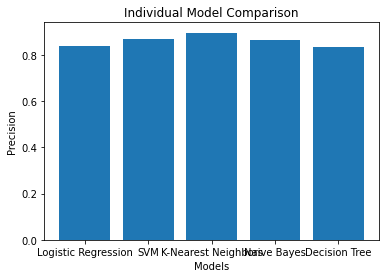

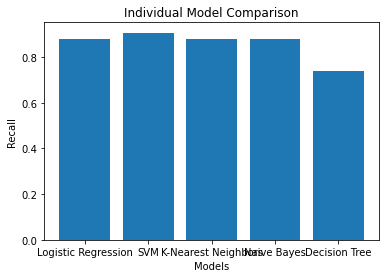

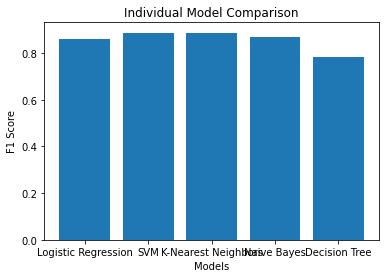

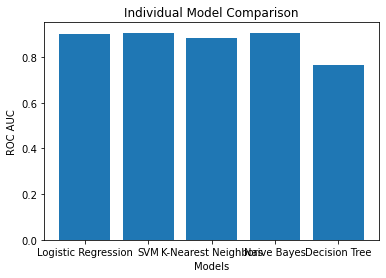

In [52]:
plot_comparison(individual_model_results, "Individual Model Comparison")


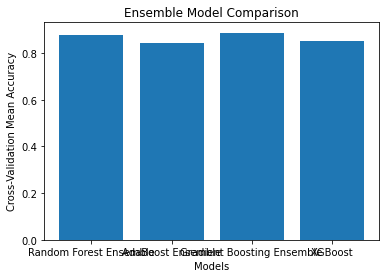

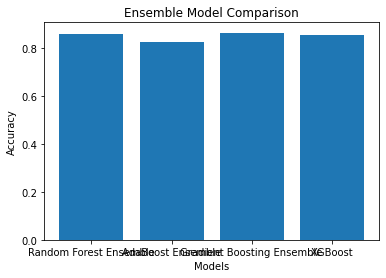

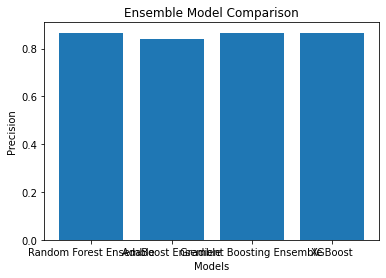

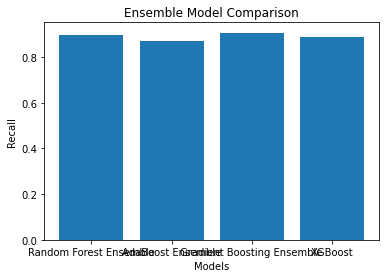

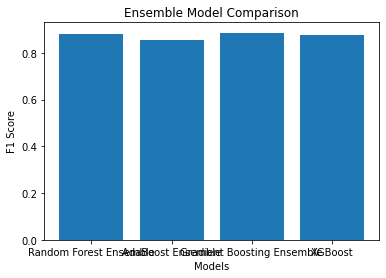

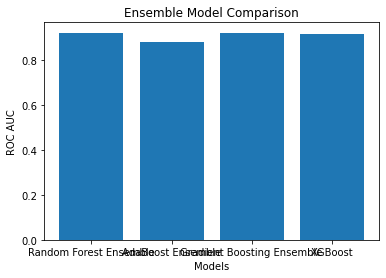

In [53]:

# Plot ensemble model results
plot_comparison(ensemble_model_results, "Ensemble Model Comparison")